# EDA on Estimation of obesity levels based on eating habits and physical condition Data Set

## Data Set Information:

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read the dataset
df=pd.read_csv('data/raw.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.shape

(2111, 17)

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [8]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Insights Or Observation

There are no missing values in the dataset

### Check Duplicates

In [9]:
duplicates=df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [10]:
df.duplicated().sum()

27

In [11]:
duplicated_values = df[duplicates]
duplicated_values

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21,1.52,42.0,no,no,3,1,Frequently,no,1,no,0,0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25,1.57,55.0,no,yes,2,1,Sometimes,no,2,no,2,0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21,1.62,70.0,no,yes,2,1,no,no,3,no,1,0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21,1.62,70.0,no,yes,2,1,no,no,3,no,1,0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21,1.62,70.0,no,yes,2,1,no,no,3,no,1,0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22,1.69,65.0,yes,yes,2,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Normal_Weight
309,Female,16,1.66,58.0,no,no,2,1,Sometimes,no,1,no,0,1,no,Walking,Normal_Weight
460,Female,18,1.62,55.0,yes,yes,2,3,Frequently,no,1,no,1,1,no,Public_Transportation,Normal_Weight
467,Male,22,1.74,75.0,yes,yes,3,3,Frequently,no,1,no,1,0,no,Automobile,Normal_Weight
496,Male,18,1.72,53.0,yes,yes,2,3,Sometimes,no,2,no,0,2,Sometimes,Public_Transportation,Insufficient_Weight


In [12]:
### Removing Duplicates

In [13]:
df1=df.drop_duplicates(keep='first')
df1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
df1.duplicated().sum()

0

### Observation

There are no duplicates in dataset.

## check datatypes

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2084 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2084 non-null   object 
 1   Age                             2084 non-null   int64  
 2   Height                          2084 non-null   float64
 3   Weight                          2084 non-null   float64
 4   family_history_with_overweight  2084 non-null   object 
 5   FAVC                            2084 non-null   object 
 6   FCVC                            2084 non-null   int64  
 7   NCP                             2084 non-null   int64  
 8   CAEC                            2084 non-null   object 
 9   SMOKE                           2084 non-null   object 
 10  CH2O                            2084 non-null   int64  
 11  SCC                             2084 non-null   object 
 12  FAF                             2084 no

## Check the number of unique values of each column

In [16]:
df1.nunique()

Gender                               2
Age                                 40
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                                 3
NCP                                  4
CAEC                                 4
SMOKE                                2
CH2O                                 3
SCC                                  2
FAF                                  4
TUE                                  3
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

### Check statistics of data set

In [17]:
df1.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000
mean,24.358445,1.702702,86.883958,2.426583,2.702975,2.011516,1.009117,0.668906
std,6.382030,0.093246,26.196093,0.584554,0.797602,0.685815,0.898825,0.673746
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,66.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.701642,83.136481,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.769607,108.025486,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Insights or Observation
- The average Age is 22-23, the maximum age is 61 and minimum age is 14.
- The average Height is 1.7m, the maximum height is 1.98m and minimum height is 1.45m
- The average Weight is 83.1kg, the maximum weight is 173kg and minimum weight is 39kg.

In [18]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### Numerical & Categorical Features

In [19]:
## Segrregate numerical and categorical features
numerical_features=[feature for feature in df1.columns if df1[feature].dtype!='O']
categorical_features=[feature for feature in df1.columns if df1[feature].dtype=='O']

In [20]:
numerical_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [21]:
categorical_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

## Check various categories present in the different categorical column

In [22]:
## Gender
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df1['Gender'].value_counts()

Gender
Male      1051
Female    1033
Name: count, dtype: int64

In [24]:
## Family_history_with_overweight 
df1['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
df1['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1720
no      364
Name: count, dtype: int64

In [26]:
## FAVC
df1['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
df1['FAVC'].value_counts()

FAVC
yes    1841
no      243
Name: count, dtype: int64

In [28]:
## CAEC
df1['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [29]:
df1['CAEC'].value_counts()

CAEC
Sometimes     1758
Frequently     236
Always          53
no              37
Name: count, dtype: int64

In [30]:
##SMOKE
df1['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
df1['SMOKE'].value_counts()

SMOKE
no     2040
yes      44
Name: count, dtype: int64

In [32]:
## SCC
df1['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [33]:
df1['SCC'].value_counts()

SCC
no     1988
yes      96
Name: count, dtype: int64

In [34]:
## CALC
df1['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [35]:
df1['CALC'].value_counts()

CALC
Sometimes     1379
no             635
Frequently      69
Always           1
Name: count, dtype: int64

In [36]:
## MTRANS
df1['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [37]:
df1['MTRANS'].value_counts()

MTRANS
Public_Transportation    1556
Automobile                455
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [38]:
## NObeyesdad
df1['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [39]:
df1['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    288
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    266
Name: count, dtype: int64

### Description of different attributes/columns

1. Gender: The gender of the individual (Male or Female).
    
2. Age: The age of the individual in years.
    
3. Height: The height of the individual in meters.
    
4. Weight: The weight of the individual in kilograms.
    
5. family_history_with_overweight: Indicates whether the individual has a family history of overweight or obesity (Yes or No).
    
6. FAVC: Indicates whether the individual frequently consumes high-caloric food or not (Yes or No).
    
7. FCVC: The frequency of consumption of vegetables (ranging between 1 to 3).
    
8. NCP: The number of main meals per day (ranging between 1 to 4).
    
9. CAEC: Consumption of food between meals ('Sometimes', 'Frequently', 'Always', 'no').
    
10. SMOKE: Indicates whether the individual smokes or not (Yes or No).
    
11. CH2O: The amount of water consumed daily (ranging between 1 to 3).
    
12. SCC: Calories consumption monitoring (Yes or No).
    
13. FAF: The frequency of physical activity (ranging between 0 to 3).
    
14. TUE: The time spent using technology devices (ranging between 0 to 2).
    
15. CALC: Consumption of alcohol (categorical variable with options such as 'no', 'Sometimes', 'Frequently', 'Always').
    
16. MTRANS: The mode of transportation used (categorical variable with options such as 'Public_Transportation', 'Walking', 'Automobile', 'Motorbike','Bike').
    
17. NObeyesdad: The classification of obesity levels (target variable) based on the WHO BMI classification ('Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II','Obesity_Type_III').

In [59]:
df1.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                                int64
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                                int64
SCC                                object
FAF                                 int64
TUE                                 int64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

## Correlation Matrix

In [62]:
df1[numerical_features].corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.032091,0.198645,0.001717,-0.054712,-0.023210,-0.137237,-0.291368
Height,-0.032091,1.000000,0.457646,-0.056403,0.228833,0.186411,0.289791,0.049563
Weight,0.198645,0.457646,1.000000,0.177810,0.088782,0.188797,-0.053324,-0.045552
FCVC,0.001717,-0.056403,0.177810,1.000000,0.004176,0.071566,0.013610,-0.078815
NCP,-0.054712,0.228833,0.088782,0.004176,1.000000,0.079101,0.129004,-0.006206
CH2O,-0.023210,0.186411,0.188797,0.071566,0.079101,1.000000,0.115871,-0.022913
FAF,-0.137237,0.289791,-0.053324,0.013610,0.129004,0.115871,1.000000,0.055723
TUE,-0.291368,0.049563,-0.045552,-0.078815,-0.006206,-0.022913,0.055723,1.000000


<Axes: >

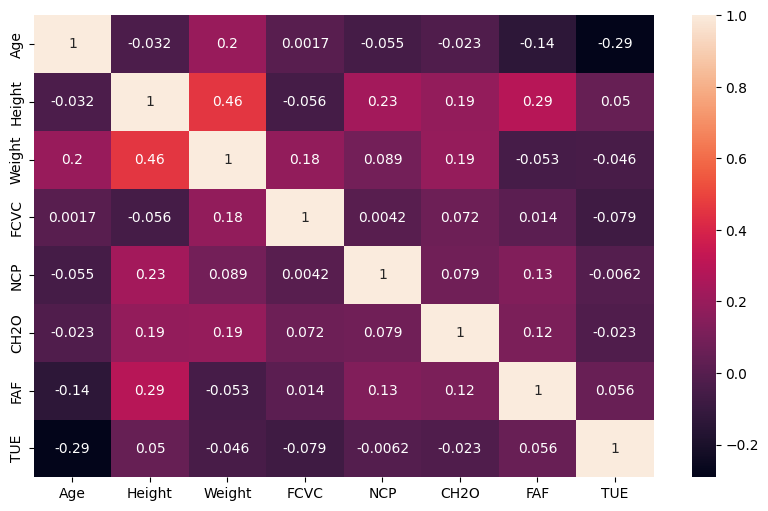

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df1[numerical_features].corr(),annot=True)

## Calculation Of BMI(Body Mass Index)

In [45]:
df1['BMI']=df1['Weight']/df1['Height']**2

In [46]:
df1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [47]:
## Average BMI
df1['BMI'].mean()

29.773254515156506

## Vizualizations

### Histograms or density plots to visualize the distribution of numerical variables like age, height, weight, etc.

<Axes: xlabel='Age', ylabel='Count'>

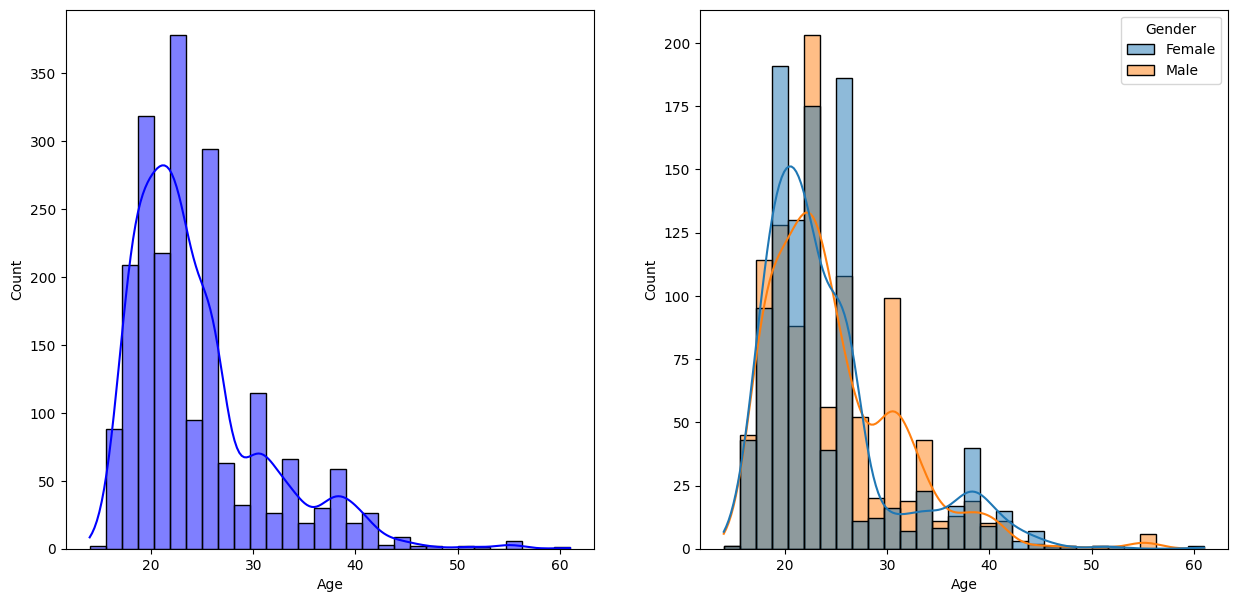

In [48]:
## Histogram For Age
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df1,x='Age',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df1,x='Age',bins=30,kde=True,hue='Gender')


<Axes: xlabel='Age', ylabel='Count'>

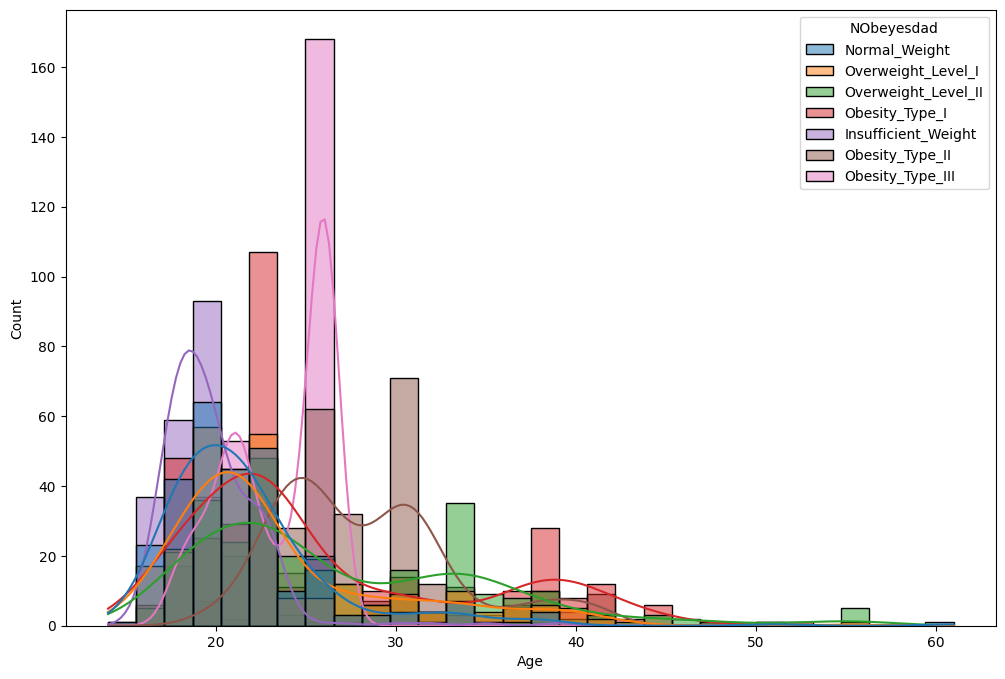

In [49]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df1,x='Age',bins=30,kde=True,hue='NObeyesdad')

## Observation
From above histogram we conclude that the most no. of obesity_type_III is from age group(24-27).

<Axes: xlabel='Height', ylabel='Count'>

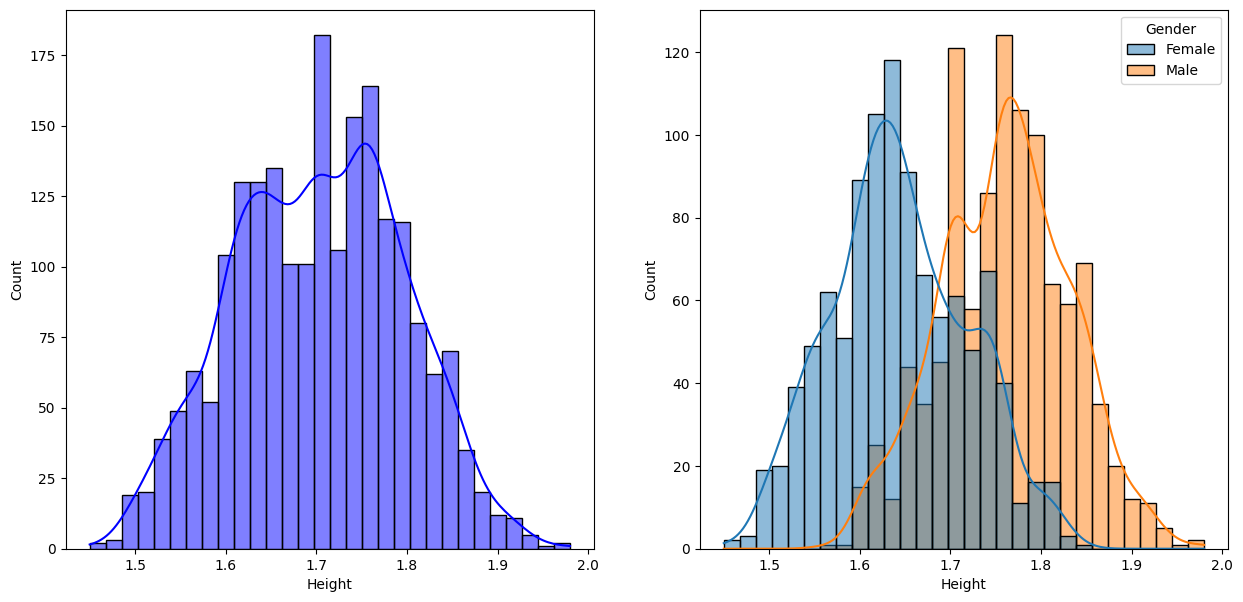

In [50]:
## Histogram For Height
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df1,x='Height',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df1,x='Height',bins=30,kde=True,hue='Gender')

<Axes: xlabel='Weight', ylabel='Count'>

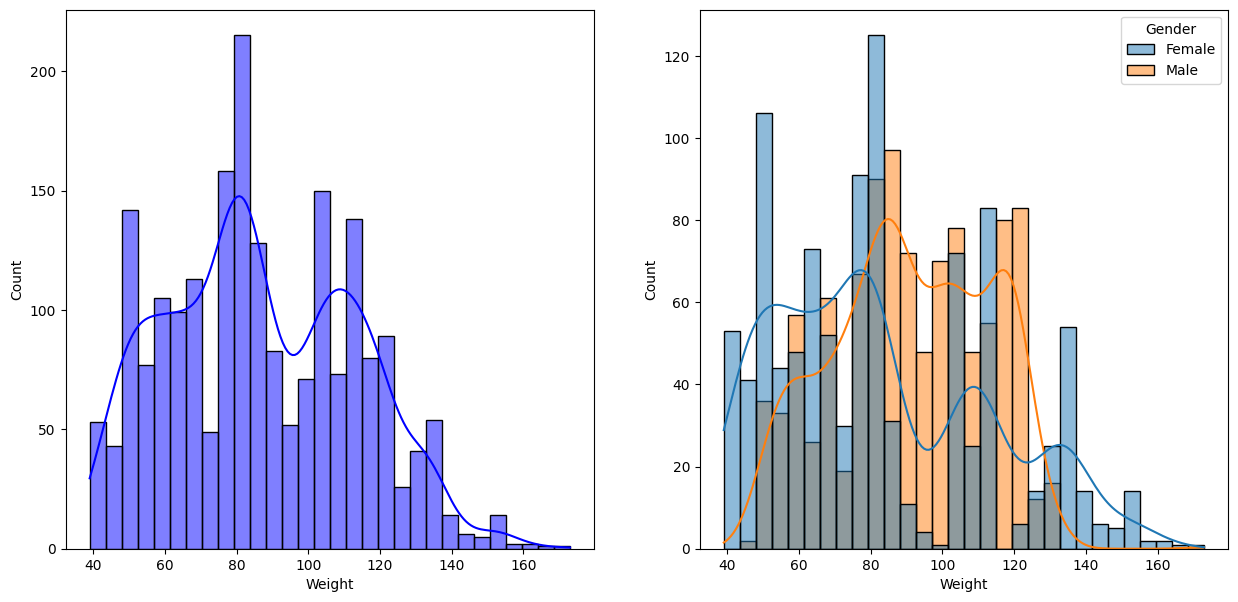

In [51]:
## Histogram For Weight
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df1,x='Weight',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df1,x='Weight',bins=30,kde=True,hue='Gender')

### Bar plots or count plots to visualize the distribution of categorical variables like gender, family history, smoking status, etc.

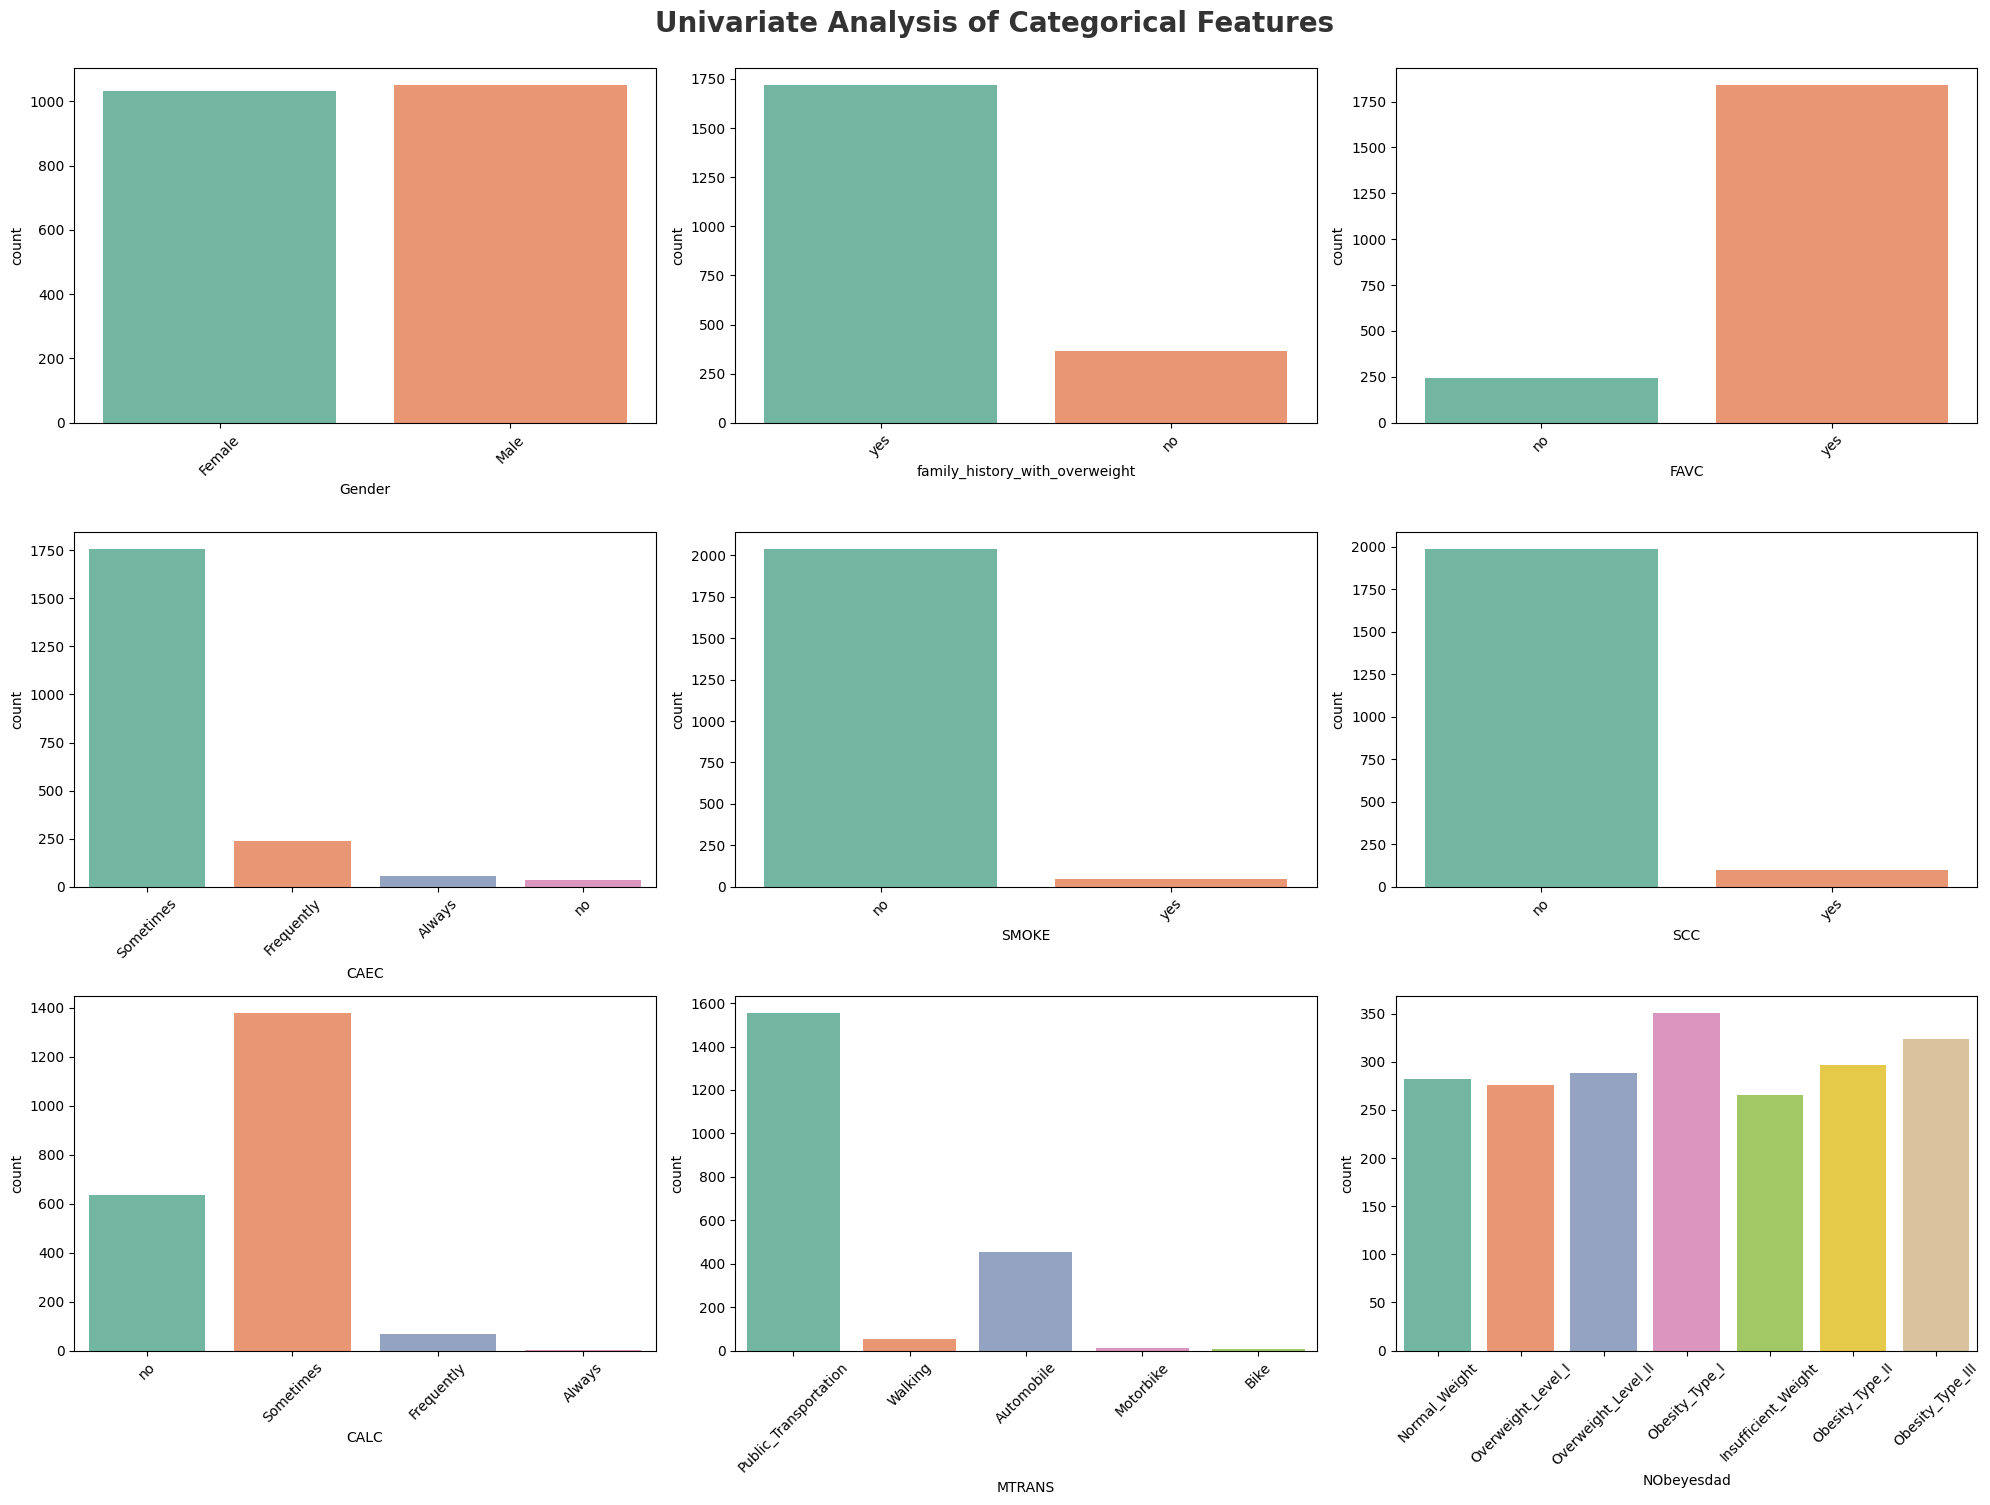

In [52]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']
for i in range(0, len(category)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df1[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

 ### Scatter plots are effective for visualizing the relationship between two numerical attributes, such as Weight vs. Height or Age vs. Weight. 

<Axes: xlabel='Weight', ylabel='Height'>

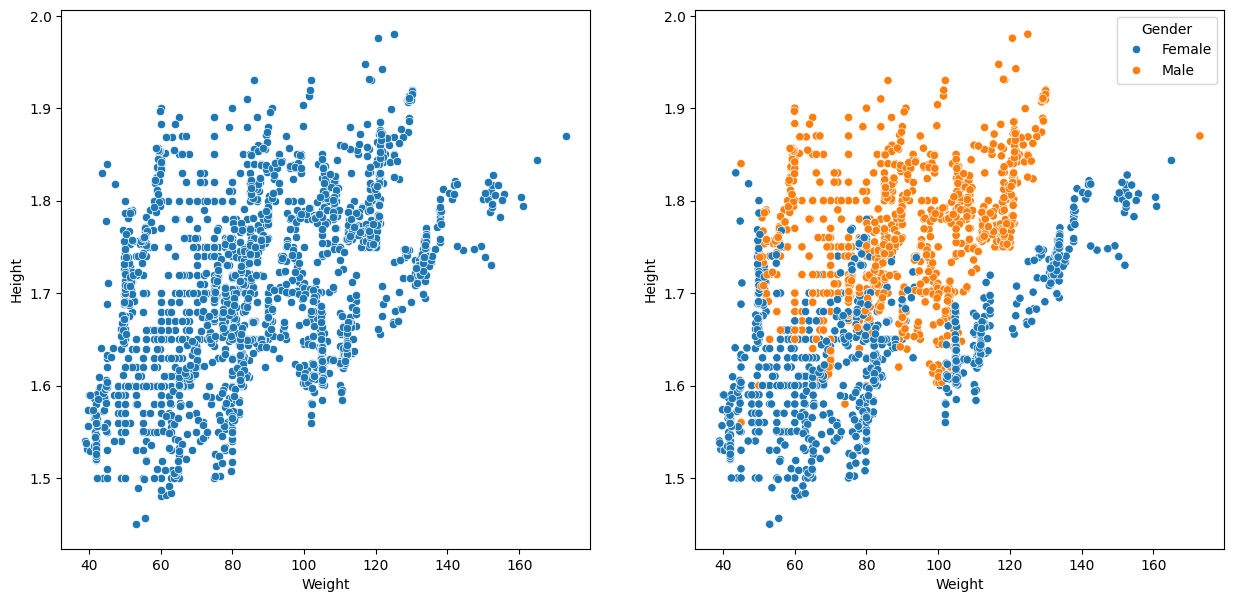

In [53]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.scatterplot(data=df1, x='Weight', y='Height')
plt.subplot(122)
sns.scatterplot(data=df1, x='Weight', y='Height',hue='Gender')


<Axes: xlabel='Weight', ylabel='CALC'>

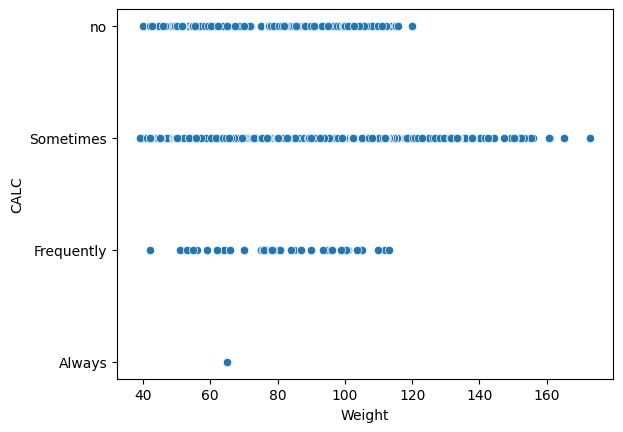

In [54]:
sns.scatterplot(data=df1, x='Weight', y='CALC')

## Observation
From above scatterplot we observe that people who consume alcohol sometimes have higher weight as compared to others. But there is also enough no. of people who do not consume alcohol but still they have higher weight.

<Axes: xlabel='Weight', ylabel='CALC'>

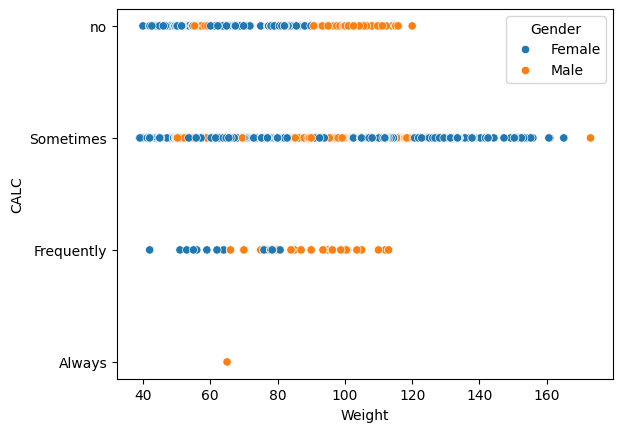

In [55]:
sns.scatterplot(data=df1, x='Weight', y='CALC',hue='Gender')

<Axes: xlabel='Age', ylabel='Weight'>

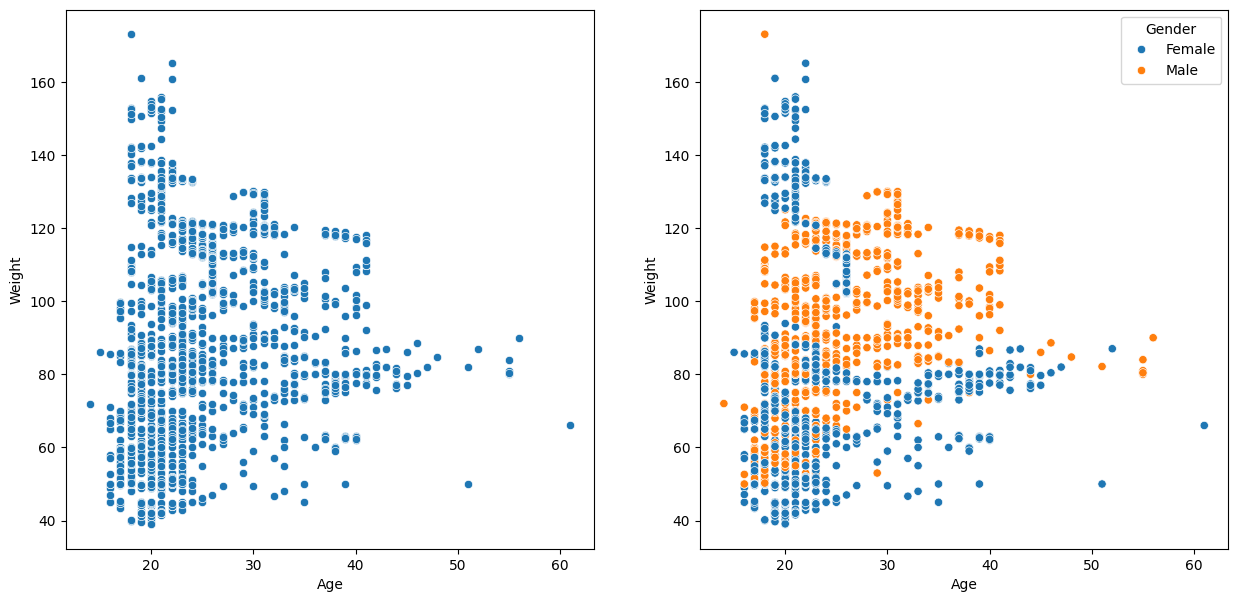

In [56]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.scatterplot(data=df1, x='Age', y='Weight')
plt.subplot(122)
sns.scatterplot(data=df1, x='Age', y='Weight',hue='Gender')

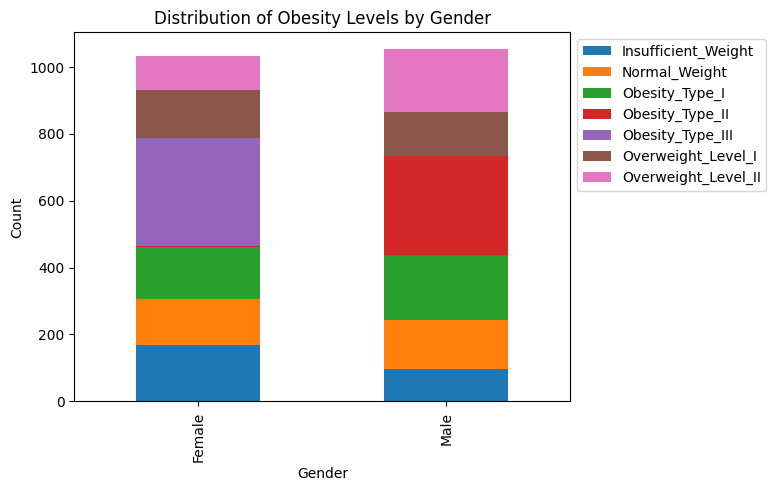

In [57]:
# Group the data by Gender and Obesity levels, and calculate the count
grouped_data = df1.groupby(['Gender', 'NObeyesdad']).size().unstack()

# Create a stacked bar chart
ax=grouped_data.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Obesity Levels by Gender')

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')


# Display the plot
plt.show()

 ## Observation
This stacked bar chart shows the distribution of Obesity levels (NObeyesdad) within each Gender category. This helps in understanding the prevalence of different obesity levels across genders.

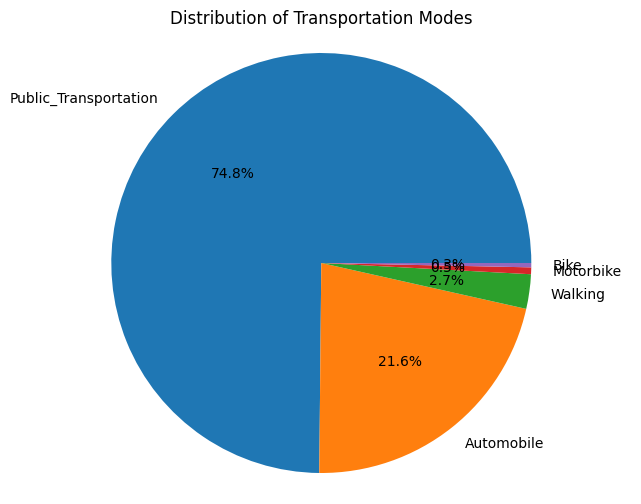

In [58]:
# Count the number of occurrences for each transportation mode
transportation_counts = df['MTRANS'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(transportation_counts, labels=transportation_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Transportation Modes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Observation
From this piechart we can observe that almost 75% prople use public transportation for travelling